# **TASK 5 - SALES PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATA ANALYSIS**

In [ ]:
df=pd.read_csv('/content/Advertising.csv')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**DATA VISUALIZATION**

<Axes: >

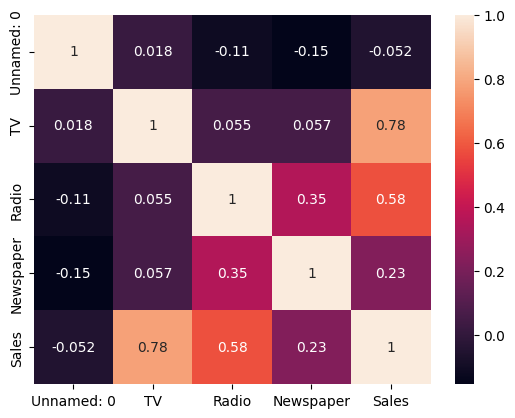

In [ ]:
sns.heatmap(df.corr(),annot=True)

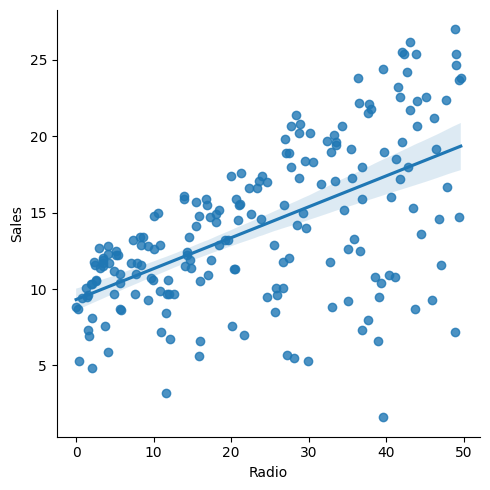

In [ ]:
sns.lmplot(data=df,x='Radio',y="Sales")

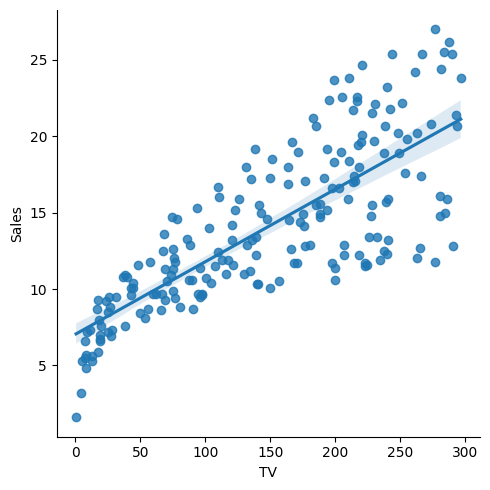

In [ ]:
sns.lmplot(data=df,x='TV',y="Sales")

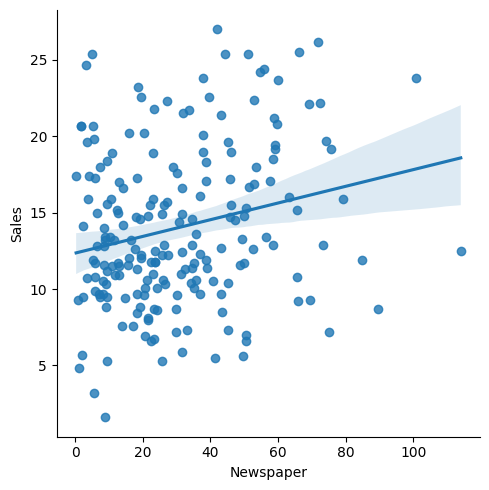

In [ ]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

**TRAINING THE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
x=df[['TV','Radio','Newspaper']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

**Random Forest Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train,y_train )
y_predict=rf.predict(x_test)

In [ ]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()})
act_predict.head(20)

,Actual,Predict
0,11.3,10.7360
1,8.4,9.3951
2,8.7,9.3122
3,25.4,25.0881
4,11.7,12.4770
5,8.7,8.9946
6,7.2,7.9889
7,13.2,12.8059
8,9.2,8.4126
9,16.6,16.3383


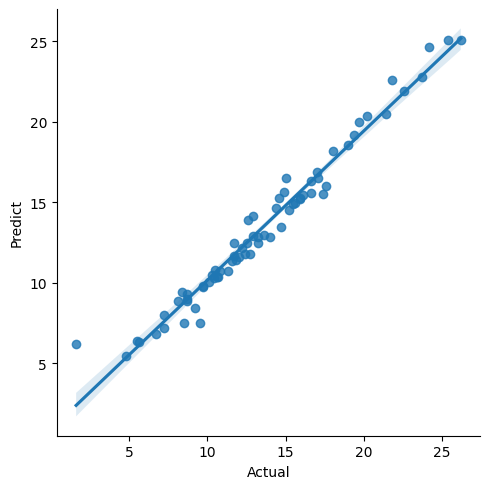

In [ ]:
sns.lmplot(data=act_predict,x='Actual',y="Predict")


**MODEL EVALUTION**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 0.6536685714285809
Mean_squared_error: 0.8499398560000067
Squre_Mean_absolute_error: 0.8084977250608569
r2_score: 0.9667695437283106
